In [2]:
# Initial imports
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np

In [3]:
file = '../Resources/2013_TEST Merge.csv'
IC_2013 = pd.read_csv(file,index_col='CandidateName')
uncleaned = pd.read_csv(file,index_col=False)
IC_2013.head()

,Election,CandidateID,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,PrevAmt,TotalAmount,Expenditure Amount,Purpose Code,Purpose
CandidateName,,,,,,,,,,,,,,
"Abiodun,Laurel-Smith",2013,1752,NaN,Corporation,New York,NY,10001.0,NaN,NaN,NaN,NaN,54.43,Office Expenses,Office Expenses
"William,Thompson, Jr.",2013,260,NaN,Corporation,New York,NY,10019.0,NaN,NaN,NaN,NaN,19.80,Other,Other: explntion
"John,Liu",2013,NaN,NaN,Limited Liability Company,Flushing,NY,11355.0,NaN,NaN,NaN,NaN,110.00,Office Expenses,Office Expenses
"John,Liu",2013,NaN,NaN,Limited Liability Company,Flushing,NY,11355.0,NaN,NaN,NaN,NaN,250.00,Fundraising,Fundraising
"William,Thompson, Jr.",2013,260,NaN,Limited Liability Company,New York,NY,10018.0,NaN,NaN,NaN,NaN,57.01,Other,Other: explntion


In [5]:
IC_2013['ZipCode'] = IC_2013['ZipCode'].apply(str)

In [8]:
IC_2013_df = IC_2013.drop(columns=['CandidateID','Election','PrevAmt'])
total_groupby = IC_2013_df.groupby(['CandidateName']).sum(['TotalAmount']).sort_values('TotalAmount',ascending=False)
total_groupby 

,Amount,MatchAmt,TotalAmount,Expenditure Amount
CandidateName,,,,
"de Blasio, Bill",11073226.59,926504.0,1.497036e+07,0.00
"Quinn, Christine C",8206058.97,689206.0,1.209154e+07,0.00
"Thompson, Jr., William C",4911412.70,417722.0,6.111452e+06,0.00
"Lhota, Joseph J",3534348.21,592210.0,4.981273e+06,0.00
"Hidary, Jack D",589596.67,75302.0,6.760667e+05,0.00
"Salgado, Erick J",363565.09,41929.0,4.948541e+05,0.00
"Liu, John C",239200.00,0.0,4.045000e+05,0.00
"Weiner, Anthony D",225088.74,0.0,2.301887e+05,0.00
"Albanese, Sal F",27178.00,0.0,3.092800e+04,0.00


<AxesSubplot:xlabel='CandidateName'>

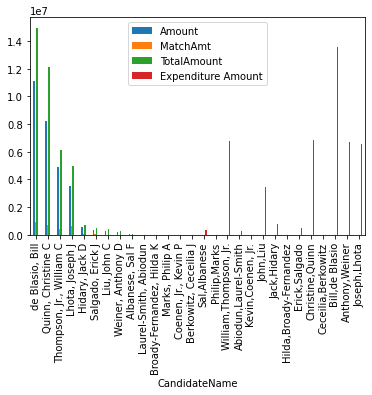

In [9]:
total_groupby.plot.bar()

In [10]:
outcome = []
for i in uncleaned['CandidateName']:
    if i == 'de Blasio, Bill':
        outcome.append('W')
    else:
        outcome.append('L')

IC_2013_df['Outcome'] = outcome
IC_2013_df.head()

,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,TotalAmount,Expenditure Amount,Purpose Code,Purpose,Outcome
CandidateName,,,,,,,,,,,,
"Abiodun,Laurel-Smith",NaN,Corporation,New York,NY,10001.0,NaN,NaN,NaN,54.43,Office Expenses,Office Expenses,L
"William,Thompson, Jr.",NaN,Corporation,New York,NY,10019.0,NaN,NaN,NaN,19.80,Other,Other: explntion,L
"John,Liu",NaN,Limited Liability Company,Flushing,NY,11355.0,NaN,NaN,NaN,110.00,Office Expenses,Office Expenses,L
"John,Liu",NaN,Limited Liability Company,Flushing,NY,11355.0,NaN,NaN,NaN,250.00,Fundraising,Fundraising,L
"William,Thompson, Jr.",NaN,Limited Liability Company,New York,NY,10018.0,NaN,NaN,NaN,57.01,Other,Other: explntion,L


<AxesSubplot:xlabel='ContributerType'>

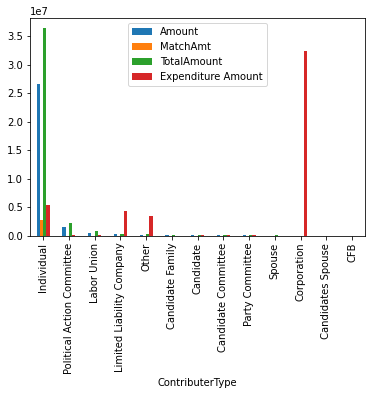

In [11]:
Cont_groupby = IC_2013_df.groupby(['ContributerType']).sum(['TotalAmount']).sort_values('TotalAmount',ascending=False)
Cont_groupby.plot.bar()

In [12]:
IC_2013_df['Date'] = pd.to_datetime(IC_2013_df['Date'])
IC_2013_df.head()

,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,TotalAmount,Expenditure Amount,Purpose Code,Purpose,Outcome
CandidateName,,,,,,,,,,,,
"Abiodun,Laurel-Smith",NaT,Corporation,New York,NY,10001.0,NaN,NaN,NaN,54.43,Office Expenses,Office Expenses,L
"William,Thompson, Jr.",NaT,Corporation,New York,NY,10019.0,NaN,NaN,NaN,19.80,Other,Other: explntion,L
"John,Liu",NaT,Limited Liability Company,Flushing,NY,11355.0,NaN,NaN,NaN,110.00,Office Expenses,Office Expenses,L
"John,Liu",NaT,Limited Liability Company,Flushing,NY,11355.0,NaN,NaN,NaN,250.00,Fundraising,Fundraising,L
"William,Thompson, Jr.",NaT,Limited Liability Company,New York,NY,10018.0,NaN,NaN,NaN,57.01,Other,Other: explntion,L


In [13]:
IC_2013_df.isnull().count()

Date                  60937
ContributerType       60937
City                  60937
State                 60937
ZipCode               60937
Amount                60937
MatchAmt              60937
TotalAmount           60937
Expenditure Amount    60937
Purpose Code          60937
Purpose               60937
Outcome               60937
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
IC_2013_df_enc = IC_2013_df.copy()
le = LabelEncoder()
IC_2013_df_enc['Date'] = le.fit_transform(IC_2013_df['Date'])
IC_2013_df_enc['ContributerType'] = le.fit_transform(IC_2013_df['ContributerType'])
IC_2013_df_enc['City'] = le.fit_transform(IC_2013_df['City'])
IC_2013_df_enc['Amount'] = le.fit_transform(IC_2013_df['Amount'])
IC_2013_df_enc['State'] = le.fit_transform(IC_2013_df['State'])
IC_2013_df_enc['ZipCode'] = le.fit_transform(IC_2013_df['ZipCode'])
IC_2013_df_enc['MatchAmt'] = le.fit_transform(IC_2013_df['MatchAmt'])
IC_2013_df_enc['TotalAmount'] = le.fit_transform(IC_2013_df['TotalAmount'])
IC_2013_df_enc['Outcome'] = le.fit_transform(IC_2013_df['Outcome'])
IC_2013_df_enc['Expenditure Amount'] = le.fit_transform(IC_2013_df['Expenditure Amount'])
IC_2013_df_enc['Purpose Code'] = le.fit_transform(IC_2013_df['Purpose Code'])
IC_2013_df_enc['Purpose'] = le.fit_transform(IC_2013_df['Purpose'])
scaler = MinMaxScaler(feature_range=(0, 1))
features = list(IC_2013_df_enc.columns)
IC_2013_df_enc[features] = scaler.fit_transform(IC_2013_df_enc[features])
IC_2013_df_enc.head()

,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,TotalAmount,Expenditure Amount,Purpose Code,Purpose,Outcome
CandidateName,,,,,,,,,,,,
"Abiodun,Laurel-Smith",1.000000,0.416667,0.606016,0.54,0.000000,1.0,1.0,1.0,0.257058,0.368421,0.333333,0.0
"William,Thompson, Jr.",0.102751,0.416667,0.606016,0.54,0.006336,1.0,1.0,1.0,0.110473,0.473684,0.444444,0.0
"John,Liu",0.102682,0.666667,0.289802,0.54,0.129180,1.0,1.0,1.0,0.387065,0.368421,0.333333,0.0
"John,Liu",0.102613,0.666667,0.289802,0.54,0.129180,1.0,1.0,1.0,0.534307,0.315789,0.277778,0.0
"William,Thompson, Jr.",0.102545,0.666667,0.606016,0.54,0.005984,1.0,1.0,1.0,0.266907,0.473684,0.444444,0.0


In [16]:
X = IC_2013_df_enc.drop('Outcome',axis = 1)

In [17]:
y = IC_2013_df_enc['Outcome']

In [18]:
# Check the balance of our target values
y.value_counts()

0.0    43667
1.0    17270
Name: Outcome, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [21]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.8314200032209003

In [22]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[8865, 2076],
       [ 633, 3661]])

In [23]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.93      0.81      0.85      0.87      0.83      0.69     10941
        1.0       0.64      0.85      0.81      0.73      0.83      0.69      4294

avg / total       0.85      0.82      0.84      0.83      0.83      0.69     15235



In [20]:
IC_2013_df_enc.head()

,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,TotalAmount,Outcome
CandidateName,,,,,,,,,
"Coenen, Jr., Kevin P",0.788584,0.0,0.596285,0.536842,0.190547,0.218412,0.0,0.126967,0.0
"Coenen, Jr., Kevin P",0.846371,0.4,0.606520,0.536842,0.026424,0.440433,1.0,0.422875,0.0
"Coenen, Jr., Kevin P",0.788584,0.0,0.596285,0.536842,0.190547,0.189531,0.0,0.111228,0.0
"Marks, Philip A",0.572234,0.0,0.111069,0.536842,0.121697,0.561372,1.0,0.504722,0.0
"Marks, Philip A",0.812544,0.0,0.111069,0.536842,0.121697,0.373646,0.0,0.484785,0.0


In [21]:
X_ContributerType = IC_2013_df_enc.drop(['Outcome','Date','City','State','ZipCode','Amount','MatchAmt','TotalAmount'],axis = 1)
y_ContributerType = IC_2013_df_enc['Outcome']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ContributerType, y_ContributerType, random_state=1)

In [23]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [24]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5065262377160307

In [25]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 105, 7532],
       [   3, 4305]])

In [26]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.97      0.01      1.00      0.03      0.12      0.01      7637
        1.0       0.36      1.00      0.01      0.53      0.12      0.02      4308

avg / total       0.75      0.37      0.64      0.21      0.12      0.01     11945



In [27]:
X_City = IC_2013_df_enc.drop(['Outcome','Date','ContributerType','State','ZipCode','Amount','MatchAmt','TotalAmount'],axis = 1)
y_City = IC_2013_df_enc['Outcome']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_City, y_City, random_state=1)

In [29]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [30]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6085476512054822

In [31]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[5285, 2352],
       [2046, 2262]])

In [32]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.72      0.69      0.53      0.71      0.60      0.37      7637
        1.0       0.49      0.53      0.69      0.51      0.60      0.36      4308

avg / total       0.64      0.63      0.59      0.63      0.60      0.37     11945



In [33]:
IC_2013_df_enc.loc[IC_2013_df_enc['Outcome']==1]

,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,TotalAmount,Outcome
CandidateName,,,,,,,,,
"de Blasio, Bill",0.334038,0.4,0.606520,0.536842,0.008932,0.489170,1.0,0.460651,1.0
"de Blasio, Bill",0.335447,0.4,0.606520,0.536842,0.008932,0.489170,1.0,0.460651,1.0
"de Blasio, Bill",0.334038,0.4,0.973844,0.536842,0.167845,0.489170,0.0,0.364113,1.0
"de Blasio, Bill",0.338266,0.4,0.111069,0.536842,0.109044,0.489170,1.0,0.460651,1.0
"de Blasio, Bill",0.324172,0.4,0.606520,0.536842,0.008560,0.583032,1.0,0.530955,1.0
...,...,...,...,...,...,...,...,...,...
"de Blasio, Bill",0.983087,0.9,0.358226,0.494737,0.752512,0.837545,0.0,0.733473,1.0
"de Blasio, Bill",0.969697,0.9,0.289234,0.536842,0.131745,0.583032,0.0,0.484785,1.0
"de Blasio, Bill",0.964059,0.9,0.011372,0.536842,0.228508,0.989170,0.0,0.884575,1.0


In [34]:
X_State = IC_2013_df_enc.drop(['Outcome','Date','ContributerType','City','ZipCode','Amount','MatchAmt','TotalAmount'],axis = 1)
y_State = IC_2013_df_enc['Outcome']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_State, y_State, random_state=1)

In [36]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [37]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5160605882104775

In [38]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 981, 6656],
       [ 415, 3893]])

In [39]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.70      0.13      0.90      0.22      0.34      0.11      7637
        1.0       0.37      0.90      0.13      0.52      0.34      0.13      4308

avg / total       0.58      0.41      0.62      0.33      0.34      0.11     11945



In [40]:
IC_2013_df_enc.head(1)

,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,TotalAmount,Outcome
CandidateName,,,,,,,,,
"Coenen, Jr., Kevin P",0.788584,0.0,0.596285,0.536842,0.190547,0.218412,0.0,0.126967,0.0


In [41]:
X_ZipCode = IC_2013_df_enc.drop(['Outcome','Date','ContributerType','State','Amount','MatchAmt','TotalAmount'],axis = 1)
y_ZipCode = IC_2013_df_enc['Outcome']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ZipCode, y_ZipCode, random_state=1)

In [43]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [44]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6362096292678621

In [45]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[4947, 2690],
       [1617, 2691]])

In [46]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.75      0.65      0.62      0.70      0.64      0.41      7637
        1.0       0.50      0.62      0.65      0.56      0.64      0.40      4308

avg / total       0.66      0.64      0.63      0.65      0.64      0.40     11945



In [47]:
IC_2013_df_enc.head()

,Date,ContributerType,City,State,ZipCode,Amount,MatchAmt,TotalAmount,Outcome
CandidateName,,,,,,,,,
"Coenen, Jr., Kevin P",0.788584,0.0,0.596285,0.536842,0.190547,0.218412,0.0,0.126967,0.0
"Coenen, Jr., Kevin P",0.846371,0.4,0.606520,0.536842,0.026424,0.440433,1.0,0.422875,0.0
"Coenen, Jr., Kevin P",0.788584,0.0,0.596285,0.536842,0.190547,0.189531,0.0,0.111228,0.0
"Marks, Philip A",0.572234,0.0,0.111069,0.536842,0.121697,0.561372,1.0,0.504722,0.0
"Marks, Philip A",0.812544,0.0,0.111069,0.536842,0.121697,0.373646,0.0,0.484785,0.0


In [48]:
X_Amount = IC_2013_df_enc.drop(['Outcome','Date','ContributerType','State','ZipCode','MatchAmt','TotalAmount'],axis = 1)
y_Amount = IC_2013_df_enc['Outcome']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Amount, y_Amount, random_state=1)

In [50]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [51]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6296625862046537

In [52]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[4808, 2829],
       [1595, 2713]])

In [53]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.75      0.63      0.63      0.68      0.63      0.40      7637
        1.0       0.49      0.63      0.63      0.55      0.63      0.40      4308

avg / total       0.66      0.63      0.63      0.64      0.63      0.40     11945



In [54]:
X_MatchAmt = IC_2013_df_enc.drop(['Outcome','Date','ContributerType','State','ZipCode','Amount','TotalAmount'],axis = 1)
y_MatchAmt = IC_2013_df_enc['Outcome']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_MatchAmt, y_MatchAmt, random_state=1)

In [56]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [57]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.628367928264014

In [58]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[4946, 2691],
       [1684, 2624]])

In [59]:
X_TotalAmount = IC_2013_df_enc.drop(['Outcome','Date','ContributerType','State','ZipCode','MatchAmt','Amount'],axis = 1)
y_TotalAmount = IC_2013_df_enc['Outcome']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_TotalAmount, y_TotalAmount, random_state=1)

In [61]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [62]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6148064437062928

In [63]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[4886, 2751],
       [1767, 2541]])

In [64]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.73      0.64      0.59      0.68      0.61      0.38      7637
        1.0       0.48      0.59      0.64      0.53      0.61      0.38      4308

avg / total       0.64      0.62      0.61      0.63      0.61      0.38     11945



In [65]:
X_Total_Zip = IC_2013_df_enc.drop(['Outcome','Date','ContributerType','State','MatchAmt','Amount'],axis = 1)
y_Total_Zip = IC_2013_df_enc['Outcome']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Total_Zip, y_Total_Zip, random_state=1)

In [67]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [68]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6370964021004617

In [69]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[5035, 2602],
       [1659, 2649]])

In [70]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.75      0.66      0.61      0.70      0.64      0.41      7637
        1.0       0.50      0.61      0.66      0.55      0.64      0.40      4308

avg / total       0.66      0.64      0.63      0.65      0.64      0.41     11945



In [71]:
# IC_2013_df = IC_2013_df.dropna()
# IC_2013_df.isnull().sum()

Date               0
ContributerType    0
City               0
State              0
ZipCode            0
Amount             0
MatchAmt           0
TotalAmount        0
Outcome            0
dtype: int64

In [24]:
IC_2013_df_enc.columns

Index(['Date', 'ContributerType', 'City', 'State', 'ZipCode', 'Amount',
       'MatchAmt', 'TotalAmount', 'Expenditure Amount', 'Purpose Code',
       'Purpose', 'Outcome'],
      dtype='object')

In [43]:
X_exp = IC_2013_df_enc.drop(['Outcome','Date','City','ContributerType','State','ZipCode','MatchAmt','Amount','MatchAmt','TotalAmount','Purpose'],axis = 1)


In [44]:
y_exp = IC_2013_df_enc['Outcome']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_exp, y_exp, random_state=1)

In [46]:
# Resample the training data with the BalancedRandomForestClassifier
# YOUR CODE HERE

from imblearn.ensemble import BalancedRandomForestClassifier
random_forest = BalancedRandomForestClassifier(n_estimators = 100,random_state = 1)
random_forest = random_forest.fit(X_train, y_train)

In [47]:
# Calculated the balanced accuracy score
# YOUR CODE HERE
from sklearn.metrics import balanced_accuracy_score
y_pred = random_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.6554702495201535

In [48]:
# Display the confusion matrix
# YOUR CODE HERE
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[3402, 7539],
       [   0, 4294]])

In [49]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       1.00      0.31      1.00      0.47      0.56      0.29     10941
        1.0       0.36      1.00      0.31      0.53      0.56      0.33      4294

avg / total       0.82      0.51      0.81      0.49      0.56      0.30     15235

